# Particle Swarm Optimization

Per ogni particella $i$ in uno swarm di dimensione $n$, possiamo calcolare il nuovo vettore posizione  $\mathbf{x}_i $e il nuovo vettore velocità $\mathbf{v}_i$ usando le equazioni:

$$
\mathbf{x}_i(t+1) = \mathbf{x}_i(t) + \mathbf{v}_i(t+1)\\
\mathbf{v}_i(t+1) = \mathbf{v}_i(t) + c_1\phi_1(t)\otimes(\mathbf{p}_i(t)-\mathbf{x}_i(t)) + c_2\phi_2(t)\otimes(\mathbf{p}_g(t)-\mathbf{x}_i(t)),
$$

dove $\mathbf{p}_i(t)$ è la migliore posizione personale della particella $i$ al tempo $t$ e $\mathbf{p}_g(t)$ è la migliore posizione globale al tempo $t$.

Usiamo quindi l'algoritmo PSO algorithm per trovare il minimo di una data funzione obiettivo $f$.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
def parab(px):
    return px**2

In [82]:
#1D function

def min_swarm(n,x,pb,v,func,max_it,ub,lb, tol):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    """
    lista = []
    n_it = 0
    g_b = pb[np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)
    lista.append(temp_x)

    c1 = 0.5
    c2 = 0.3
    v = temp_v + c1*np.random.rand(1,n)*(temp_pb-temp_x) + c2*np.random.rand(1,n)*(g_b -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space
    if(np.min(x[0])<lb):
        ind_m= np.argwhere(x[0]<lb)
        ind_m = ind_m[0]
        x[0][ind_m] = lb
    if(np.max(x[0])>ub):
        ind_M = np.argwhere(x[0]>ub)
        ind_M = ind_M[0]
        x[0][ind_M] = ub

    lista.append(x[0])

    bool_vec = func(x[0])<func(temp_pb[0])

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[index[0::]] = (x[0][index[0::]])
    g_b = pb[np.argmin(func(pb))]

    radius = np.max(abs(x[0]-g_b))/(abs(ub-lb))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb
        v = temp_v + c1*np.random.rand(1,n)*(temp_pb-temp_x) + c2*np.random.rand(1,n)*(g_b -temp_x)
        x = temp_x +v
        if(np.min(x[0])<lb):
            ind_m = np.argmin(x[0])
            x[0][ind_m] = lb
        if(np.max(x[0])>ub):
            ind_M = np.argmax(x[0])
            x[0][ind_M] = ub

        lista.append(x[0])
        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)
        bool_vec = np.asarray(bool_vec[0])
        index = np.argwhere(bool_vec==True)
        pb[index[0::]] = (x[0][index[0::]])
        g_b = pb[np.argmin(func(pb))]
        radius = np.max(abs(x[0]-g_b))/(abs(ub-lb))

    return x,v,pb,n_it,g_b,radius, lista

In [80]:
n = 5
U = 10
L = -10

#x = x_min + \phi*(x_max - x_min)
x = L + (U-L)*np.random.rand(1,n)
x = x[0] # List object
pb = x # personal best
v = np.zeros([1,n])#velocity vector

In [83]:
N_x,N_v,N_pb,N_it,g_b,r, lista_Nx= min_swarm(n, x , pb, v, parab, 15, U, L, 1e-4)
print('\n last position vector ', N_x)
print('\n last global best ', g_b)
print('\n number of iterations ', N_it)
print('\n radius of the swarm ', r)

x = N_x[0]
pb = x

v = np.zeros([1,n])#velocity vector


[[ True False  True  True  True]]
[[0 0]
 [0 2]
 [0 3]
 [0 4]]
POST
[ True False  True  True  True]
[[0]
 [2]
 [3]
 [4]]
[-1.41429677e-01 -2.89825767e-03 -1.29133697e+00  2.91528444e-01
 -6.53596388e+00]
[[ True False  True  True  True]]
[[0 0]
 [0 2]
 [0 3]
 [0 4]]
POST
[ True False  True  True  True]
[[0]
 [2]
 [3]
 [4]]
[-5.57174278e-02 -2.89825767e-03 -9.09472300e-01  1.43491589e-01
 -5.01749217e+00]
[[False False  True  True  True]]
[[0 2]
 [0 3]
 [0 4]]
POST
[False False  True  True  True]
[[2]
 [3]
 [4]]
[ 0.03616347 -0.00289826 -0.46247316  0.05489233 -2.48583973]
[[False False False False False]]
[]
POST
[False False False False False]
[]
[ 0.03616347 -0.00289826  0.10780634 -0.04786734  0.04657642]
[[False False False False False]]
[]
POST
[False False False False False]
[]
[ 0.03616347 -0.00289826  0.10780634 -0.04786734  0.04657642]
[[False False False False False]]
[]
POST
[False False False False False]
[]
[ 0.03616347 -0.00289826  0.10780634 -0.04786734  0.04657642]
[[Fa

In [ ]:
lista_Nx[0].shape

(5,)

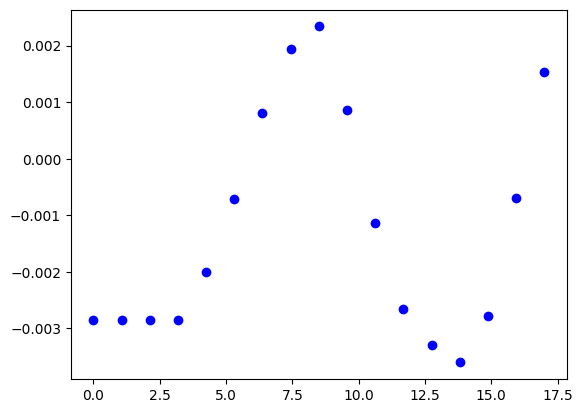

In [ ]:
array_lista = np.asarray(lista_Nx)
plt.plot(np.linspace(0,17,17), array_lista[:,4],'ob')

In [84]:
def parab2(v):#v is a bidimentional array
    return v[0,:]**2+v[1,:]**2

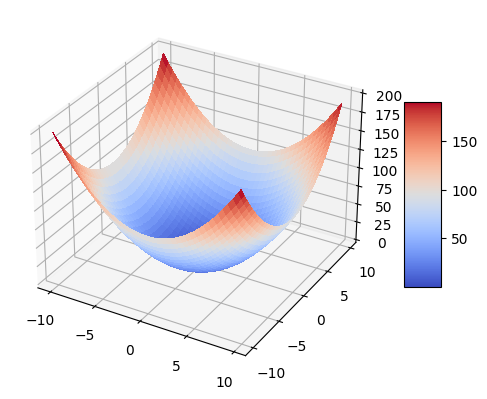

In [5]:
Xplot = np.arange(L, U, 0.25)
Yplot = np.arange(L, U, 0.25)
XP, YP = np.meshgrid(Xplot, Yplot)
Z = XP**2 + YP**2
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(XP, YP, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

In [4]:
def diameter(ub,lb):
    # ub, lb are coordinates vectors
    return np.linalg.norm(ub-lb)

In [100]:
#nD function

def min_swarmND(n,x,pb,v,func,max_it,ub,lb, tol, D = 2):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    - D : dimension of the search space
    """

    n_it = 0
    g_b = pb[:,np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)

    c1 = 0.5
    c2 = 0.3

    v = temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space

    x[x<lb] = lb

    x[x>ub] = ub


    bool_vec = func(x)<func(temp_pb)

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[:,index[0::]] = (x[:,index[0::]])
    g_b = pb[:,np.argmin(func(pb))]

    radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb

        v = temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
        x = temp_x +v

        x[x<lb] = lb
        x[x>ub] = ub

        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)

        index = np.argwhere(bool_vec==True)

        pb[:,index[0::]] = (x[:,index[0::]])
        g_b = pb[:,np.argmin(func(pb))]
        radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    return x,v,pb,n_it,g_b,radius

In [379]:
#nD function

def min_swarmND_weightedNonLinear(n,x,pb,v,func,max_it,ub,lb, tol, D = 2):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    - D : dimension of the search space
    """

    n_it = 0
    g_b = pb[:,np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)

    c1 = 0.001
    c2 = 0.001
    w_t = 0.9
    v = w_t*temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space

    x[x<lb] = lb

    x[x>ub] = ub


    bool_vec = func(x)<func(temp_pb)

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[:,index[0::]] = (x[:,index[0::]])
    g_b = pb[:,np.argmin(func(pb))]

    radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb
        w_t = (w_t-0.4)*(max_it-n_it-1)/(max_it + 0.4)
        v = w_t*temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
        x = temp_x +v

        x[x<lb] = lb
        x[x>ub] = ub

        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)

        index = np.argwhere(bool_vec==True)

        pb[:,index[0::]] = (x[:,index[0::]])
        g_b = pb[:,np.argmin(func(pb))]
        radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    return x,v,pb,n_it,g_b,radius

In [110]:
#nD function

def min_swarmND_weightedLinear(n,x,pb,v,func,max_it,ub,lb, tol, D = 2):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    - D : dimension of the search space
    """

    n_it = 0
    g_b = pb[:,np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)

    c1 = 0.5
    c2 = 0.2
    w_0 = 0.9
    w_nt=0.4
    w=(w_0-w_nt)*(max_it-n_it-1)/(max_it)+w_nt
    v = w*temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space

    x[x<lb] = lb

    x[x>ub] = ub


    bool_vec = func(x)<func(temp_pb)

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[:,index[0::]] = (x[:,index[0::]])
    g_b = pb[:,np.argmin(func(pb))]

    radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb
        w=(w_0-w_nt)*(max_it-n_it)/(max_it)+w_nt
        v = w*temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
        x = temp_x +v

        x[x<lb] = lb
        x[x>ub] = ub

        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)

        index = np.argwhere(bool_vec==True)

        pb[:,index[0::]] = (x[:,index[0::]])
        g_b = pb[:,np.argmin(func(pb))]
        radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    return x,v,pb,n_it,g_b,radius

In [153]:
#nD function

def min_swarmND_weightedRandom(n,x,pb,v,func,max_it,ub,lb, tol, D = 2):
    """
    INPUT:
    - n: size of the swarm
    - x: initial position vectors for the n particles
    - pb: vector for personal best positions
    - v: velocity vector
    - max_it: maximum number of iterations
    - ub: upper bound
    - lb: lower bound
    - tol: accuracy treshold
    - D : dimension of the search space
    """

    n_it = 0
    g_b = pb[:,np.argmin(func(pb))] #global best position
    temp_x = np.copy(x)
    temp_v = np.copy(v)
    temp_pb = np.copy(pb)

    c1 = 0.5
    c2 = 0.2
    #sample w from a Gaussian distribution
    w= np.random.normal(loc=0.75,scale=0.15)
    v = w*temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
    x = temp_x +v

    # Check if x goes beyond the boundaries of the Search Space

    x[x<lb] = lb

    x[x>ub] = ub


    bool_vec = func(x)<func(temp_pb)

    pb = np.asarray(pb)
    index = np.argwhere(bool_vec==True)

    pb[:,index[0::]] = (x[:,index[0::]])
    g_b = pb[:,np.argmin(func(pb))]

    radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    while ( (radius >tol) & (n_it<max_it)):
        temp_x = x
        temp_v = v
        temp_pb = pb
        w= np.random.normal(loc=0.75,scale=0.15)
        v = w*temp_v + c1*np.random.rand(D,n)*(temp_pb-temp_x) + c2*np.random.rand(D,n)*(g_b.reshape(D,1) -temp_x)
        x = temp_x +v

        x[x<lb] = lb
        x[x>ub] = ub

        n_it = n_it+1
        bool_vec = func(x)<func(temp_pb)

        index = np.argwhere(bool_vec==True)

        pb[:,index[0::]] = (x[:,index[0::]])
        g_b = pb[:,np.argmin(func(pb))]
        radius = np.max(np.linalg.norm(x-g_b.reshape(D,1)))/diameter(np.array([lb, lb]), np.array([ub, ub]))

    return x,v,pb,n_it,g_b,radius

In [172]:
n = 5
U = 10
L = -10

#x = x_min + \phi*(x_max - x_min)
x2 = np.array([[L],[L]]) + np.array([[(U-L)],[(U-L)]])*np.random.rand(2,n)
print(x2)
pb2 = x2 # personal best
v2 = np.zeros([2,n])#velocity vector

[[-7.91773302  5.17010946 -4.93733935  8.32565402  9.74097887]
 [ 5.66732946 -6.89992407 -9.67173819 -1.36723078 -3.4054693 ]]


In [167]:
Nx2,Nv2,Npb2,n_it2,g_b2,radius2 = min_swarmND_weightedRandom(n,x2,pb2,v2,parab2,20,U,L, 1e-3)

x2 = Nx2
pb2 = Npb2

v2 = np.zeros([2,n])#velocity vector

In [168]:

print('\n last position vector ', Nx2)
print('\n last global best ', g_b2)
print('\n number of iterations ', n_it2)
print('\n radius of the swarm ', radius2)


 last position vector  [[-0.00092819  0.00099725  0.00058022  0.00054114 -0.00183321]
 [-0.00288748 -0.00036332  0.00054889  0.01636089  0.00750123]]

 last global best  [0.00058022 0.00054889]

 number of iterations  0

 radius of the swarm  0.0006317342945497302


In [ ]:
def Booth(v):#v is a bidimentional array
    return (v[0,:]+2*v[1,:]-7)**2+ (2*v[0,:] + v[1,:]-5)**2

In [ ]:
n = 5
U = 10
L = -10

#x = x_min + \phi*(x_max - x_min)
xB = np.array([[L],[L]]) + np.array([[(U-L)],[(U-L)]])*np.random.rand(2,n)

pbB = xB # personal best
vB = np.zeros([2,n])#velocity vector

In [ ]:
NxB,NvB,NpbB,n_itB,g_bB,radiusB = min_swarmND_weightedRandom(n,xB,pbB,vB,Booth,100,U,L, 1e-3)

xB = NxB
pbB = NpbB

vB = np.zeros([2,n])#velocity vector

print('\n last position vector ', NxB)
print('\n last global best ', g_bB)
print('\n number of iterations ', n_itB)
print('\n radius of the swarm ', radiusB)



 last position vector  [[1.36416685 1.347881   1.38020955 1.34166244 1.3336566 ]
 [2.20639658 2.19466393 2.21428368 2.19257637 2.23892369]]

 last global best  [1.38020955 2.21428368]

 number of iterations  100

 radius of the swarm  0.0028462782774274944


Applicazione all'algoritmo di Google Page-Ranking. Costruiamo una matrice di hyperlink e calcoliamo "l'autovettore corrispondente all'autovalore $\lambda = 1$", formulando il seguente problema di ottimizzazione:

$$
\min_{I(P)} \|H I(P) \|_2
$$

In [387]:
H = np.array([[0,0,0,0,0,0,1/3,0],[1/2,0,1/2,1/3,0,0,0,0],[1/2,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0],[0,0,1/2,1/3,0,0,1/3,0], [0,0,0,1/3,1/3,0,0,1/2],[0,0,0,0,1/3,0,0,1/2],[0,0,0,0,1/3,1,1/3,0]])
print(np.sum(H,0))

[1. 1. 1. 1. 1. 1. 1. 1.]


In [376]:
def Rank(v):
  return np.linalg.norm(np.dot(H,v))

In [498]:
n = 12
U = 1
L = 0

#x = x_min + \phi*(x_max - x_min)
xH = np.array([[L],[L],[L],[L],[L],[L],[L],[L]]) + np.array([[(U-L)],[(U-L)],[(U-L)],[(U-L)],[(U-L)],[(U-L)],[(U-L)],[(U-L)]])*np.random.rand(8,n)

print(np.sum(xH,0))
pbH = xH # personal best
vH = np.zeros([8,n])#velocity vector

[4.06381457 4.2721985  4.47545796 2.89970174 4.25920762 4.53791797
 4.9341953  3.5725541  3.81677855 5.4695933  4.00796179 4.65671678]


In [542]:
NxH,NvH,NpbH,n_itH,g_bH,radiusH = min_swarmND_weightedNonLinear(n,xH,pbH,vH,Rank,150,U,L, 1e-3,8)

xH = NxH
pbH = NpbH

vH = np.zeros([8,n])#velocity vector

#print('\n last position vector ', NxH)
print('\n last global best ', g_bH)
print('\n number of iterations ', n_itH)
print('\n radius of the swarm ', radiusH)

sum=0
for x in g_bH:
  sum+=x
print(sum)


 last global best  [0.70571626 0.23495242 0.34437369 0.83331184 0.89847875 0.17649298
 0.70863776 0.16185088]

 number of iterations  150

 radius of the swarm  2.0785815087641213
4.063814572016776
